In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import library
import re #regx library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypdf import PdfReader # Read pdf


%matplotlib inline

In [22]:
plt.style.use('seaborn-v0_8-dark')

In [3]:
df = pd.read_csv('./datasets/data.csv')
df = pd.DataFrame(df)
df.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Job Title,Job Description
0,Flutter Developer,We are looking for hire experts flutter develo...
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,Full Stack Developer,job responsibility full stack engineer – react...


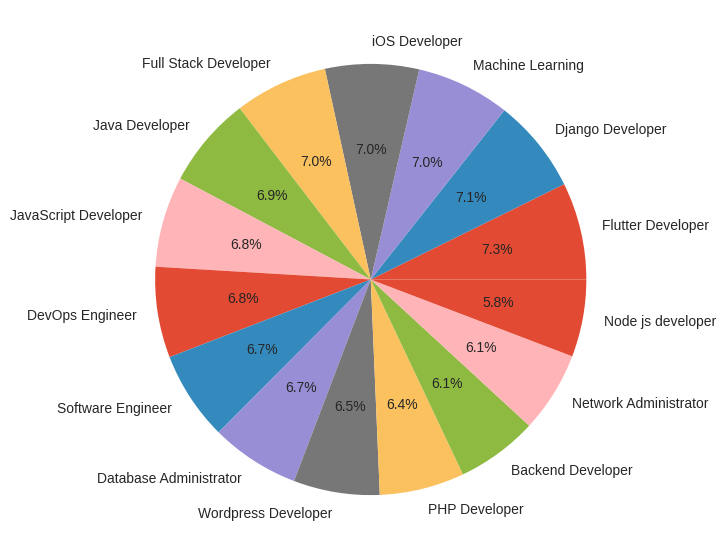

In [25]:
counts = df['Job Title'].value_counts()
label = df['Job Title'].unique()
plt.figure(figsize=(7,7))
plt.pie(counts,labels=label,autopct='%1.1f%%')
plt.show()

In [38]:
# Clean Job Description
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    cleanText = cleanText.lower()
    return cleanText

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))

In [30]:
cleanResume('HEllo i am Ali Hassan')

'hello i am ali hassan'

In [37]:
df['Job Description']

0       We are looking for hire experts flutter develo...
1       PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2       Data Scientist (Contractor)\n\nBangalore, IN\n...
3       JOB DESCRIPTION:\n\nStrong framework outside o...
4       job responsibility full stack engineer – react...
                              ...                        
2272    Job Summary\nPublished on : 26 days ago\nVacan...
2273    business entity cisco umbrella focus cloud-bas...
2274    Urgently reqd in a college in Mohali\nNetwork ...
2275    Key Responsibilities: Team leads for small or ...
2276    leslie hindman auctioneer one nation 's leadin...
Name: Job Description, Length: 2277, dtype: object